In [25]:
#!pip install --upgrade autokeras tensorflow -q

In [2]:
# # переключиться на полуточную арифметику (float16)
# import tensorflow as tf
# from tensorflow.keras.mixed_precision import Policy
# policy = Policy('mixed_float16')
# tf.keras.mixed_precision.set_global_policy(policy)


In [ ]:
#!pip install tensorboard

In [3]:
#!pip install scikit-optimize -q

In [2]:
#!pip install optuna -q

In [21]:
#!pip install optuna-integration[tfkeras] -q

In [26]:
#!pip install optuna-dashboard -q

In [52]:
#!pip install autokeras --upgrade --force-reinstall -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.1.3 which is incompatible.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.5 which is incompatible.
super-gradients 3.7.1 requires numpy<=1.23, but you have numpy 2.1.3 which is incompatible.
super-gradients 3.7.1 requires protobuf==3.20.3, but you have protobuf 5.29.5 which is incompatible.
super-gradients 3.7.1 requires termcolor==1.1.0, but you have termcolor 3.1.0 which is incompatible.
tf-keras 2.20.1 requires tensorflow<2.21,>=2.20, but you have tensorflow 2.19.1 which is incompatible.


In [3]:
# # Оптимизация TensorFlow
# import tensorflow as tf
# tf.config.optimizer.set_jit(True)  # Включение XLA-компиляции
# tf.config.threading.set_intra_op_parallelism_threads(8)
# #tf.config.threading.set_inter_op_parallelism_threads(8)

# # Для GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#             #tf.config.experimental.set_memory_limit(gpu, 8192)  # Лимит 8GB
#     except RuntimeError as e:
#         print(e)

In [1]:
!nvidia-smi

Wed Oct 22 08:24:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.01              Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:01:00.0 Off |                  N/A |
|  0%   40C    P8             10W /  200W |    1126MiB /  12282MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
'''
import os
import kaggle
import zipfile

# Скачаем напрямую через Kaggle API в текущую папку
dataset_name = 'bhavikjikadara/dog-and-cat-classification-dataset'
download_path = './cats_dogs_data'

print("📥 Downloading dataset...")
kaggle.api.dataset_download_files(
    dataset_name, 
    path=download_path, 
    unzip=True  # Важно: распаковываем автоматически!
)
'''

In [1]:
# Текущая директория
import os
HOME = os.getcwd()
print(HOME)
print('-----------------------')
# Пути
IMAGE_PATH = "/home/oleg/projects/datasets/construction"
#dataset_path = "./animals"
#dataset_path = "./cars_pretrained"
#dataset_path = "./construction"
#IMAGE_PATH = dataset_path
os.listdir(IMAGE_PATH)

/home/oleg/projects/ML
-----------------------


['mining_loader',
 'bulldozer',
 'ice_rink',
 'dump_truck',
 'excavator',
 'person',
 'car',
 'truck_crane']

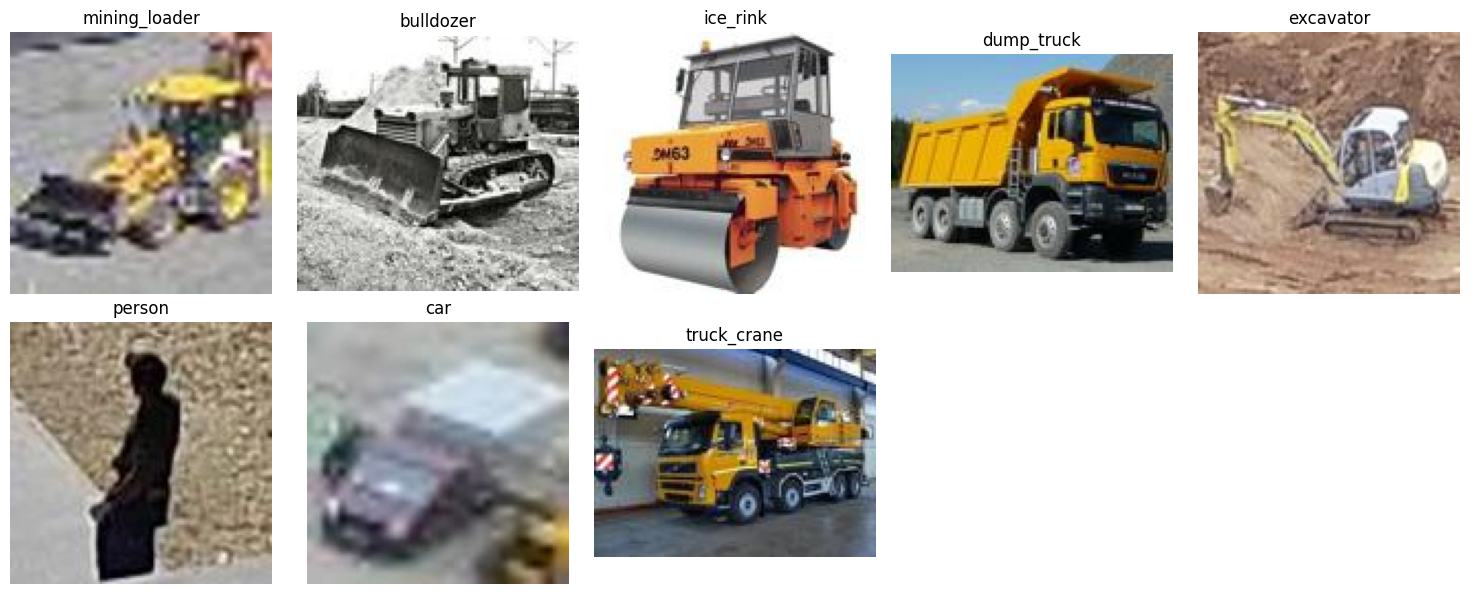

🎲 Показано по 1 случайному изображению из 8 категорий


In [2]:
# Показано по 1 случайному изображению из каждой категорий
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

# Создаем график 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

categories = os.listdir(IMAGE_PATH)
plot_index = 0

for category in categories:
    category_path = os.path.join(IMAGE_PATH, category)
    file_names = os.listdir(category_path)
    
    # Берем 1 случайное изображение из каждой категории
    if file_names:
        random_file = random.choice(file_names)
        img_path = os.path.join(category_path, random_file)
        img = Image.open(img_path)
        
        axes[plot_index].imshow(img)
        axes[plot_index].set_title(f"{category}", fontsize=12)
        axes[plot_index].axis('off')
        plot_index += 1

# Скрываем лишние subplot'ы
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"🎲 Показано по 1 случайному изображению из {plot_index} категорий")

📊 АНАЛИЗ ДАТАСЕТА:
  bulldozer: 194 файлов
  car: 1586 файлов
  dump_truck: 797 файлов
  excavator: 316 файлов
  ice_rink: 293 файлов
  mining_loader: 514 файлов
  person: 969 файлов
  truck_crane: 321 файлов
📈 ИТОГО: 4990 изображений, 8 классов


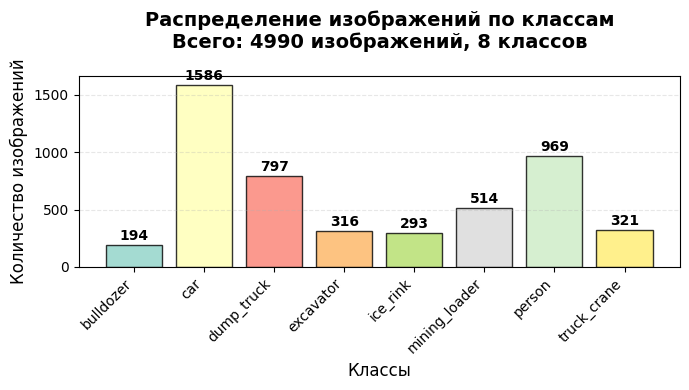

In [3]:
# Простой анализ датасета с визуализацией

import os
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset_simple(dataset_path):
    """
    Простой анализ датасета с визуализацией
    """
    # Проверяем существование пути
    if not os.path.exists(dataset_path):
        print(f"❌ Ошибка: путь '{dataset_path}' не существует")
        return None
    
    # Получаем список классов
    class_names = [d for d in os.listdir(dataset_path) 
                  if os.path.isdir(os.path.join(dataset_path, d))]
    class_names.sort()
    
    if not class_names:
        print("❌ В датасете не найдено папок с классами")
        return None
    
    # Подсчет файлов
    class_counts = {}
    total_files = 0
    
    print("📊 АНАЛИЗ ДАТАСЕТА:")
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        count = len(image_files)
        class_counts[class_name] = count
        total_files += count
        print(f"  {class_name}: {count} файлов")
    
    print(f"📈 ИТОГО: {total_files} изображений, {len(class_names)} классов")
    
    # Визуализация
    plt.figure(figsize=(7, 4))
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Создаем диаграмму
    bars = plt.bar(classes, counts, color=plt.cm.Set3(np.linspace(0, 1, len(classes))), 
                   edgecolor='black', alpha=0.8)
    
    # Настройки графика
    plt.title(f'Распределение изображений по классам\nВсего: {total_files} изображений, {len(class_names)} классов', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Классы', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    
    # Поворачиваем подписи и выравниваем
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Добавляем сетку для удобства чтения
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    
    # Настраиваем отступы
    plt.tight_layout()
    
    plt.show()
    
    return {'class_names': class_names, 'class_counts': class_counts, 'total_files': total_files}

# ИСПОЛЬЗОВАНИЕ:
# Просто вызовите функцию с путем к вашему датасету
result = analyze_dataset_simple(IMAGE_PATH)

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

height, width = 224, 224
batch_size=16

# ✅ ЛУЧШЕ - короче и читаемее



train_data, validation_data = image_dataset_from_directory(
    IMAGE_PATH,
    label_mode='categorical',
    validation_split=0.2,
    subset='both',  # ← одна строка вместо двух
    seed=123,
    image_size=(height, width),
    batch_size=batch_size,
    shuffle=True  # Перемешивание данных
)

# Проверка количества изображений в каждой поддиректории
class_counts = {}
for class_name in os.listdir(IMAGE_PATH):
    class_path = os.path.join(IMAGE_PATH, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])


print("Class counts:", class_counts)

# Оптимизация потока данных
#train_data = train_data.cache().prefetch(buffer_size=1)
#validation_data = validation_data.cache().prefetch(buffer_size=1)
#train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# train_data = train_data.cache().prefetch(buffer_size=1)
# validation_data = validation_data.cache().prefetch(buffer_size=1)
# Это дает БОЛЬШЕ ускорения чем настройки TensorFlow!
#train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE).cache()
#validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)
#------------------------------------------------------------------------------------------------------
# ✅ ДЛЯ ОБУЧАЮЩИХ ДАННЫХ (с аугментацией):
#train_data = train_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
# ✅ ДЛЯ ВАЛИДАЦИОННЫХ ДАННЫХ (без аугментации):
#validation_data = validation_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
# 2. ✅ ПРАВИЛЬНАЯ оптимизация - БЕЗ повторного .batch()!

train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(tf.data.AUTOTUNE)
print(f"✅ Оптимизированный pipeline:")
print(f"   Train: {len(list(train_data))} батчей")
print(f"   Validation: {len(list(validation_data))} батчей")
#------------------------------------------------------------------------------------------------------

# Проверка формата меток на обучающих данных
for images, labels in train_data.take(1):
    print("Формат меток (train):", labels.shape, labels.dtype)
    print("Пример меток (train):", labels.numpy())
#Тема #17. Классификация изображений на AutoKeras


# Проверка формата меток на валидационных данных
for images, labels in validation_data.take(1):
    print("Формат меток (validation):", labels.shape, labels.dtype)
    print("Пример меток (validation):", labels.numpy())

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
#print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Found 4990 files belonging to 8 classes.
Using 3992 files for training.
Using 998 files for validation.
Class counts: {'mining_loader': 514, 'bulldozer': 194, 'ice_rink': 293, 'dump_truck': 797, 'excavator': 316, 'person': 969, 'car': 1586, 'truck_crane': 321}
✅ Оптимизированный pipeline:
   Train: 250 батчей
   Validation: 63 батчей
Формат меток (train): (16, 8) <dtype: 'float32'>
Пример меток (train): [[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
Формат меток (validation): (16, 8) <dtype: 'float32'>
Пример меток (validation): [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.

2025-10-22 09:54:48.777856: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
# Посмотреть размер одного батча
for images, labels in train_data.take(1):
    print("Форма одного батча:", images.shape)
    print("Размер одного батча в MiB:",
          tf.size(images).numpy() * 4 / (1024 ** 2), "MiB")

Форма одного батча: (16, 224, 224, 3)
Размер одного батча в MiB: 9.1875 MiB


2025-10-21 13:12:46.577635: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


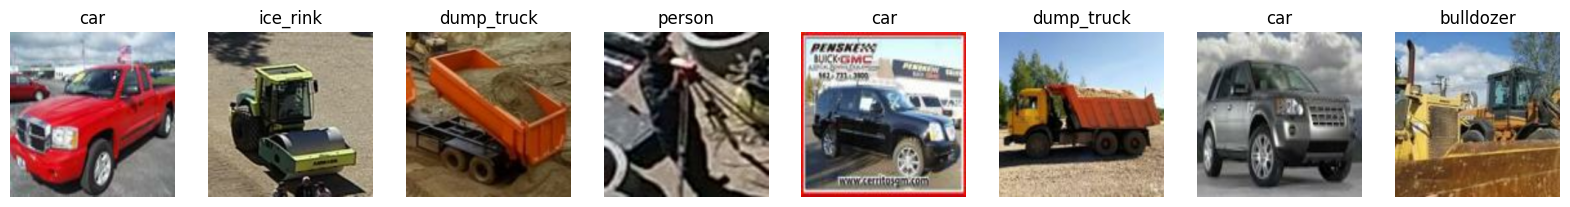

2025-10-21 13:12:46.846969: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


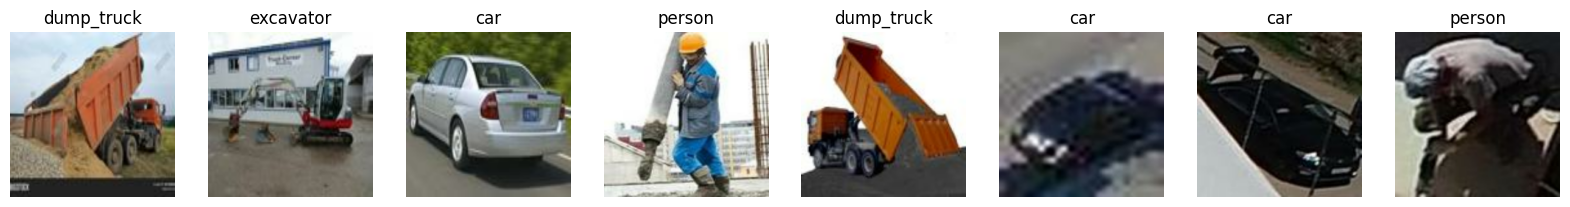

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Функция для визуализации изображений
def visualize_images(dataset, class_list, num_images=8):
    images, labels = next(iter(dataset))
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.set_title(class_list[np.argmax(labels[i].numpy())])
        ax.axis('off')
    plt.show()

# Визуализация изображений из обучающей выборки
visualize_images(train_data, CLASS_LIST)

# Визуализация изображений из валидационной выборки
visualize_images(validation_data, CLASS_LIST)

In [10]:
# Добавьте для диагностики
import time

print("🧪 ТЕСТ ПРОИЗВОДИТЕЛЬНОСТИ...")
start_time = time.time()

# Тест скорости одного батча
for i, (images, labels) in enumerate(train_data.take(10)):
    if i == 0:
        batch_time = time.time() - start_time
        print(f"⏱️ Первый батч: {batch_time:.2f} сек")
    
print(f"⏱️ 10 батчей: {time.time() - start_time:.2f} сек")

# Идеальные показатели:
# - Первый батч: 0.5-2 сек (из-за кэширования)
# - Последующие: 0.1-0.5 сек на батч

🧪 ТЕСТ ПРОИЗВОДИТЕЛЬНОСТИ...
⏱️ Первый батч: 0.01 сек
⏱️ 10 батчей: 0.01 сек


In [29]:
# ДОБАВЬТЕ ЭТО ДЛЯ ДИАГНОСТИКИ
print("🔍 ДИАГНОСТИКА AUTOKERAS...")
print(f"Количество батчей в train_data: {len(list(train_data))}")
print(f"Количество батчей в validation_data: {len(list(validation_data))}")

# Проверим, что данные загружаются
sample_batch = next(iter(train_data))
print(f"Размер батча: {sample_batch[0].shape}")
print(f"Размер меток: {sample_batch[1].shape}")

🔍 ДИАГНОСТИКА AUTOKERAS...
Количество батчей в train_data: 499
Количество батчей в validation_data: 125
Размер батча: (8, 224, 224, 3)
Размер меток: (8, 8)


In [7]:
# Критически важно проверить!
print("🔍 Проверяем реальные данные...")

for images, labels in train_data.take(1):
    print(f"Форма изображений: {images.shape}")
    print(f"Тип данных: {images.dtype}")
    
    # Если форма (batch, 224, 224, 1) - проблема!
    if images.shape[-1] == 1:
        print("❌ ПРОБЛЕМА: Изображения в grayscale!")
        print("Нужно конвертировать в RGB")
        
        # Принудительная конвертация
        def convert_to_rgb(images, labels):
            if images.shape[-1] == 1:
                images = tf.repeat(images, 3, axis=-1)
            return images, labels
        
        train_data = train_data.map(convert_to_rgb)
        validation_data = validation_data.map(convert_to_rgb)
        
        print("✅ Конвертировано в RGB")

🔍 Проверяем реальные данные...
Форма изображений: (16, 224, 224, 3)
Тип данных: <dtype: 'float32'>


In [8]:
import tensorflow as tf
print(tf.__version__)

2.19.1


In [9]:
import autokeras as ak
print(f"AutoKeras version: {ak.__version__}")

AutoKeras version: 2.0.0


In [10]:
import autokeras as ak

# Посмотрим все доступные блоки
available_blocks = [attr for attr in dir(ak) if 'Block' in attr or 'Head' in attr]
print("Доступные блоки в AutoKeras 2.0.0:")
for block in sorted(available_blocks):
    print(f"  - {block}")

Доступные блоки в AutoKeras 2.0.0:
  - BertBlock
  - Block
  - ClassificationHead
  - ConvBlock
  - DenseBlock
  - EfficientNetBlock
  - Head
  - ImageBlock
  - RNNBlock
  - RegressionHead
  - ResNetBlock
  - TextBlock
  - XceptionBlock


In [11]:
# Сначала проверьте формат ваших данных
for images, labels in train_data.take(1):
    print(f"Форма изображений: {images.shape}")
    print(f"Количество каналов: {images.shape[-1]}")
    print(f"Диапазон значений: [{tf.reduce_min(images):.2f}, {tf.reduce_max(images):.2f}]")
    
    # Если каналов 1, используйте преобразование
    if images.shape[-1] == 1:
        print("⚠️ Обнаружены grayscale изображения! Используйте Способ 1 или 3")

Форма изображений: (16, 224, 224, 3)
Количество каналов: 3
Диапазон значений: [0.00, 255.00]


In [13]:
import gc
import os
import time
import autokeras as ak
from tensorflow.keras import layers
import tensorflow as tf
import warnings
from tensorflow.keras.applications import EfficientNetB0

# Настройки
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit_disabled'
#gc.collect()

# Подавление предупреждений
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")


# ⭐ САМАЯ ПРОСТАЯ РАБОЧАЯ АРХИТЕКТУРА
input_node = ak.ImageInput()#shape=(224, 224, 3))
#output_node = ak.Normalization()(input_node)

# Используем EfficientNetBlock с предобученными весами
output_node = ak.EfficientNetBlock(
    version='b0',              # Можно b0, b1, b2, etc.
    #pretrained=True,           # Используем предобученные веса
    #normalize=True             # Нормализация входных данных
)(input_node)


# Добавляем сверточный блок для дополнительного извлечения признаков
output_node = ak.ConvBlock(
    num_layers=2,  # количество слоев в блоке
    filters=64,  # количество фильтров в каждом слое
    kernel_size=2,  # размер ядра для свертки
    max_pooling=True,  # использование MaxPooling
    dropout=0.3  # dropout для регуляризации
)(output_node)

# Добавляем слой для классификации
output_node = ak.ClassificationHead(
    num_classes=8,  # ⭐ ВАЖНО: указываем количество классов
    dropout=0.3  # dropout в классификационном слое
)(output_node)

# Создание AutoModel
model = ak.AutoModel(
    max_trials=10,  #  количество попыток для поиска лучшей модели
    inputs=input_node,
    outputs=output_node,
    objective='val_accuracy',
    overwrite=True,
    directory='automodel_pretrain_EfficientNetBlock_b0',
    tuner='bayesian'  # Используем Bayesian Optimization для подбора параметров
)

print("🚀 Запуск обучения AutoKeras...")

start_time = time.time()
# Обучение с большим количеством эпох
history = model.fit(
    train_data,
    epochs=5,                 # ✓ Больше эпох для сходимости
    validation_data=validation_data,
    #callbacks=callbacks,
    verbose=1
)
end_time = time.time()
print(f"⏰ Время обучения: {(end_time - start_time)/60:.2f} минут")

Trial 10 Complete [00h 00m 03s]

Best val_accuracy So Far: 0.2905811667442322
Total elapsed time: 00h 07m 30s
Epoch 1/5
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1801 - loss: 2.0787

2025-10-22 10:04:59.913004: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion', 180 bytes spill stores, 180 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion_1', 292 bytes spill stores, 292 bytes spill loads



250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 107ms/step - accuracy: 0.2192 - loss: 2.0776 - val_accuracy: 0.2876 - val_loss: 2.0753
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3011 - loss: 2.0723 - val_accuracy: 0.2796 - val_loss: 2.0687
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.3029 - loss: 2.0647 - val_accuracy: 0.3016 - val_loss: 2.0564
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.2998 - loss: 2.0487 - val_accuracy: 0.2906 - val_loss: 2.0171
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3036 - loss: 2.0090 - val_accuracy: 0.2896 - val_loss: 1.9552
⏰ Время обучения: 9.03 минут


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2906 - loss: 1.8695
Loss: 1.8695452213287354
Accuracy: 0.2905811667442322


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 6, 6, 64)       │        87,104 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 5, 5, 64)       │         4,416 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_2 (Softmax) │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,141,611 (15.80 MB)

 Trainable params: 4,099,588 (15.64 MB)

 Non-trainable params: 42,023 (164.16 KB)

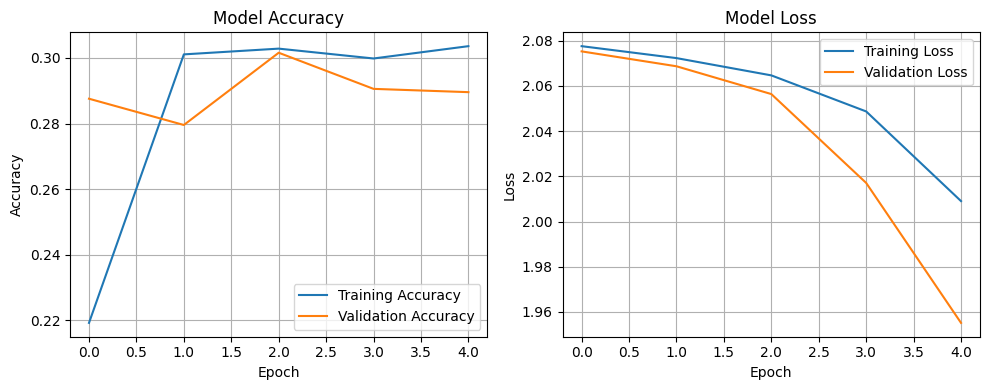

In [14]:
# Для меток ONE-HOT

# метки ONE-HOT

# Для AutoModel - получаем лучшую модель
best_model_1 = model.export_model()  # ← ИЗМЕНИЛОСЬ: model.export_model() 

# проверяем модель на тестовой выборке
loss, accuracy = best_model_1.evaluate(validation_data, batch_size=32, verbose=1)

# Выводим результаты оценки модели
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

best_model_1.summary()

import matplotlib.pyplot as plt

# Функция для построения графиков
def plot_training_history(history):
    """Функция для построения графиков обучения"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # График точности
    if 'accuracy' in history.history:
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # График потерь
    if 'loss' in history.history:
        ax2.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Вызов функции
plot_training_history(history)

🚀 ЗАПУСК УНИВЕРСАЛЬНОГО CONFUSION MATRIX АНАЛИЗА
🔍 УНИВЕРСАЛЬНЫЙ CONFUSION MATRIX АНАЛИЗ

📊 ДИАГНОСТИКА ТИПА МЕТОК:
Форма меток в данных: (998, 8)
Пример меток: [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
✅ Обнаружены ONE-HOT метки
📏 Всего примеров: 998
🎯 Уникальные классы в данных: [0 1 2 3 4 5 6 7]


2025-10-21 18:29:09.546949: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


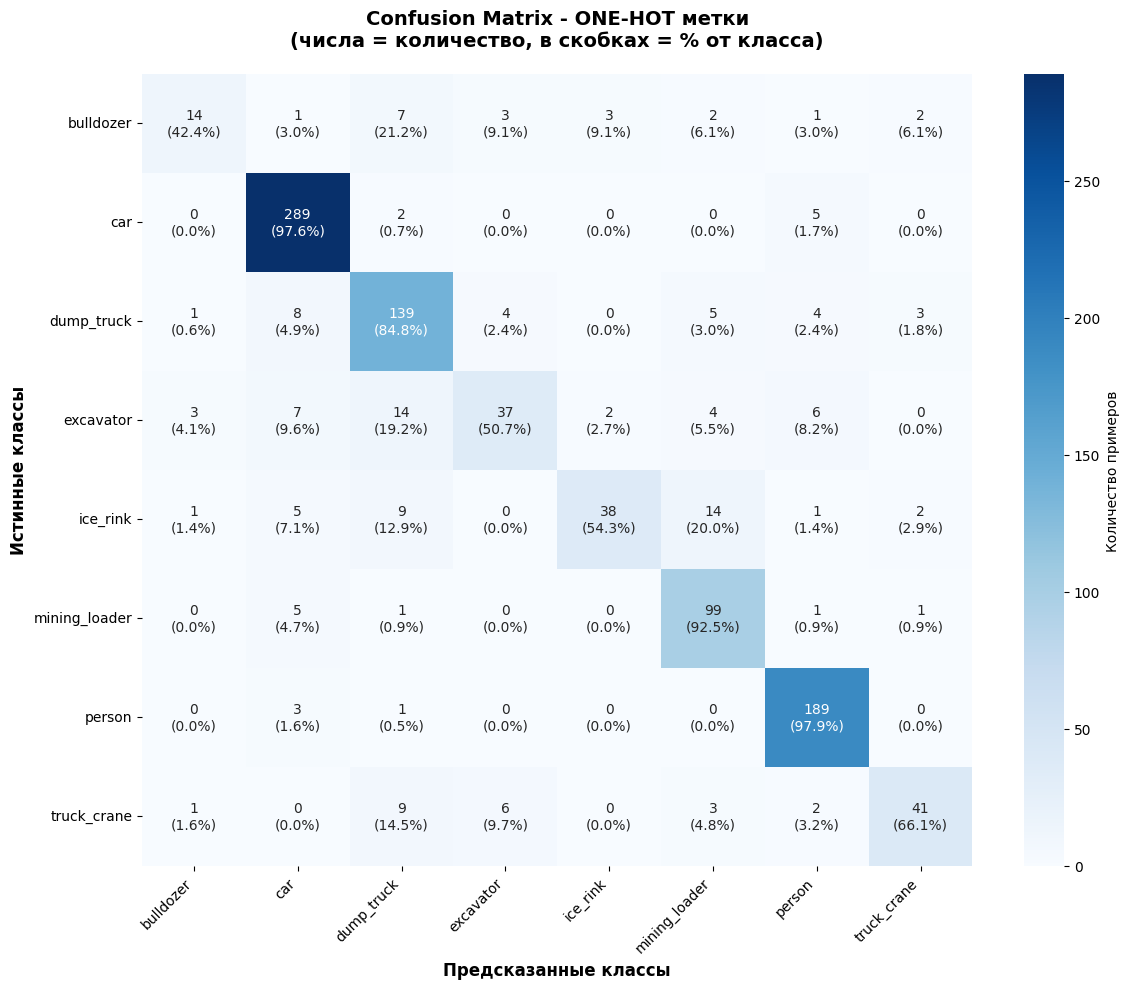


📈 ОБЩАЯ СТАТИСТИКА:
Тип меток: ONE-HOT
Всего примеров: 998
Общая точность: 0.8477 (84.77%)

🎯 ТОЧНОСТЬ ПО КЛАССАМ:
  bulldozer      : 42.42% ( 14/ 33)
  car            : 97.64% (289/296)
  dump_truck     : 84.76% (139/164)
  excavator      : 50.68% ( 37/ 73)
  ice_rink       : 54.29% ( 38/ 70)
  mining_loader  : 92.52% ( 99/107)
  person         : 97.93% (189/193)
  truck_crane    : 66.13% ( 41/ 62)

📋 ДЕТАЛЬНЫЙ CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    bulldozer     0.7000    0.4242    0.5283        33
          car     0.9088    0.9764    0.9414       296
   dump_truck     0.7637    0.8476    0.8035       164
    excavator     0.7400    0.5068    0.6016        73
     ice_rink     0.8837    0.5429    0.6726        70
mining_loader     0.7795    0.9252    0.8462       107
       person     0.9043    0.9793    0.9403       193
  truck_crane     0.8367    0.6613    0.7387        62

     accuracy                         0.8477       998
    macr

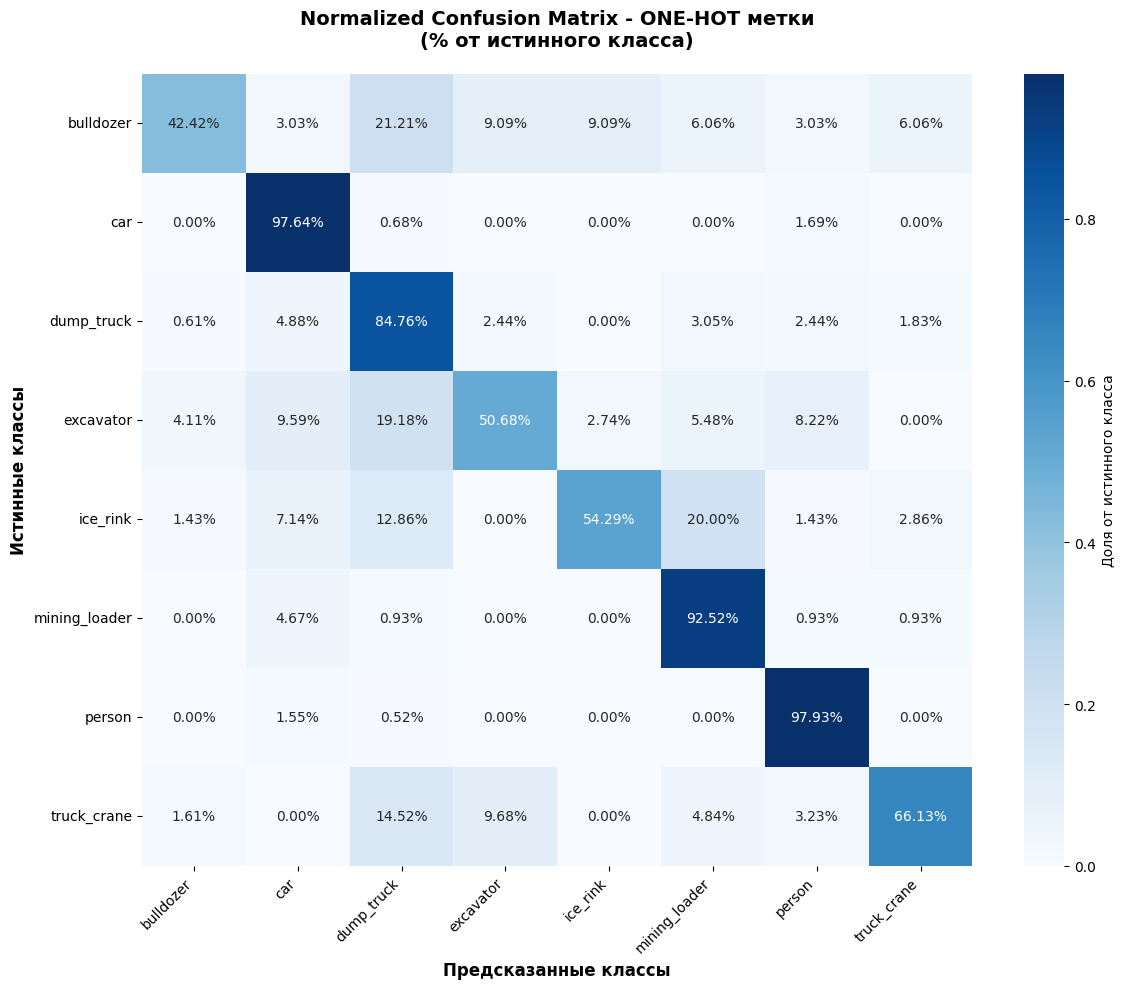


📋 ИТОГОВАЯ ИНФОРМАЦИЯ:
✅ Тип меток: ONE-HOT
✅ Общая точность: 0.8477
✅ Классов в данных: 8
✅ Классов в предсказаниях: 8
⚠️  УМЕРЕННЫЙ ДИСБАЛАНС: соотношение 9.0:1


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def universal_confusion_matrix_analysis(model, dataset, class_names):
    """УНИВЕРСАЛЬНЫЙ анализ Confusion Matrix для ONE-HOT и INT меток"""
    
    print("🔍 УНИВЕРСАЛЬНЫЙ CONFUSION MATRIX АНАЛИЗ")
    print("=" * 50)
    
    # Собираем предсказания и метки
    all_preds = []
    all_true_labels = []
    
    for images, labels in dataset:
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
    
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    # 🔍 ОПРЕДЕЛЯЕМ ТИП МЕТОК
    print("\n📊 ДИАГНОСТИКА ТИПА МЕТОК:")
    print(f"Форма меток в данных: {all_true_labels.shape}")
    print(f"Пример меток: {all_true_labels[:5]}")
    
    if len(all_true_labels.shape) == 1:
        label_type = "INTEGER"
        true_classes = all_true_labels
        print("✅ Обнаружены INTEGER метки [0, 1, 2, ...]")
    else:
        label_type = "ONE-HOT"
        true_classes = np.argmax(all_true_labels, axis=1)
        print("✅ Обнаружены ONE-HOT метки")
    
    pred_classes = np.argmax(all_preds, axis=1)
    
    print(f"📏 Всего примеров: {len(true_classes)}")
    print(f"🎯 Уникальные классы в данных: {np.unique(true_classes)}")
    
    # Confusion Matrix
    cm = confusion_matrix(true_classes, pred_classes, labels=range(len(class_names)))
    
    # 📈 ВИЗУАЛИЗАЦИЯ С ПРОЦЕНТАМИ
    plt.figure(figsize=(12, 10))
    
    # Аннотации с числами и процентами
    annot_matrix = np.empty_like(cm, dtype=object)
    total_per_class = cm.sum(axis=1)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            count = cm[i, j]
            percentage = (count / total_per_class[i] * 100) if total_per_class[i] > 0 else 0
            annot_matrix[i, j] = f'{count}\n({percentage:.1f}%)'
    
    # Heatmap
    sns.heatmap(cm, annot=annot_matrix, fmt='', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Количество примеров'})
    
    plt.xlabel('Предсказанные классы', fontsize=12, fontweight='bold')
    plt.ylabel('Истинные классы', fontsize=12, fontweight='bold')
    plt.title(f'Confusion Matrix - {label_type} метки\n(числа = количество, в скобках = % от класса)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 📊 СТАТИСТИКА
    total_samples = len(true_classes)
    accuracy = np.sum(pred_classes == true_classes) / total_samples
    
    print(f"\n📈 ОБЩАЯ СТАТИСТИКА:")
    print(f"Тип меток: {label_type}")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    class_accuracies = []
    for i, class_name in enumerate(class_names):
        correct = cm[i, i]
        total = cm[i, :].sum()
        accuracy_class = correct / total if total > 0 else 0
        class_accuracies.append(accuracy_class)
        print(f"  {class_name:<15}: {accuracy_class:>6.2%} ({correct:>3d}/{total:>3d})")
    
    # Проблемные классы (точность < 10%)
    problem_classes = [(class_names[i], acc) for i, acc in enumerate(class_accuracies) if acc < 0.1 and cm[i, :].sum() > 0]
    if problem_classes:
        print(f"\n⚠️  ПРОБЛЕМНЫЕ КЛАССЫ (точность < 10%):")
        for cls, acc in problem_classes:
            print(f"   {cls}: {acc:.2%}")
    
    # 📋 CLASSIFICATION REPORT
    print(f"\n📋 ДЕТАЛЬНЫЙ CLASSIFICATION REPORT:")
    print(classification_report(true_classes, pred_classes, 
                              target_names=class_names, digits=4))
    
    # 📉 НОРМАЛИЗОВАННАЯ CONFUSION MATRIX
    plt.figure(figsize=(12, 10))
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Доля от истинного класса'})
    
    plt.xlabel('Предсказанные классы', fontsize=12, fontweight='bold')
    plt.ylabel('Истинные классы', fontsize=12, fontweight='bold')
    plt.title(f'Normalized Confusion Matrix - {label_type} метки\n(% от истинного класса)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return {
        'confusion_matrix': cm,
        'label_type': label_type,
        'accuracy': accuracy,
        'class_accuracies': class_accuracies,
        'true_classes': true_classes,
        'pred_classes': pred_classes
    }

# 🚀 ЗАПУСК УНИВЕРСАЛЬНОГО АНАЛИЗА
print("🚀 ЗАПУСК УНИВЕРСАЛЬНОГО CONFUSION MATRIX АНАЛИЗА")
print("=" * 50)

results = universal_confusion_matrix_analysis(best_model, validation_data, CLASS_LIST)

# 📊 ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ
print("\n" + "=" * 50)
print("📋 ИТОГОВАЯ ИНФОРМАЦИЯ:")
print(f"✅ Тип меток: {results['label_type']}")
print(f"✅ Общая точность: {results['accuracy']:.4f}")
print(f"✅ Классов в данных: {len(np.unique(results['true_classes']))}")
print(f"✅ Классов в предсказаниях: {len(np.unique(results['pred_classes']))}")

# Проверка на дисбаланс
unique, counts = np.unique(results['true_classes'], return_counts=True)
if len(unique) > 0:
    max_count = max(counts)
    min_count = min(counts)
    imbalance_ratio = max_count / min_count if min_count > 0 else float('inf')
    
    if imbalance_ratio > 10:
        print(f"⚠️  СИЛЬНЫЙ ДИСБАЛАНС: соотношение {imbalance_ratio:.1f}:1")
    elif imbalance_ratio > 5:
        print(f"⚠️  УМЕРЕННЫЙ ДИСБАЛАНС: соотношение {imbalance_ratio:.1f}:1")
    else:
        print(f"✅ ДАННЫЕ СБАЛАНСИРОВАНЫ: соотношение {imbalance_ratio:.1f}:1")

🚀 ЗАПУСК CONFUSION MATRIX ДЛЯ ONE-HOT МЕТОК...
🔍 Получаем предсказания для ONE-HOT меток...
✅ Обработано 998 примеров


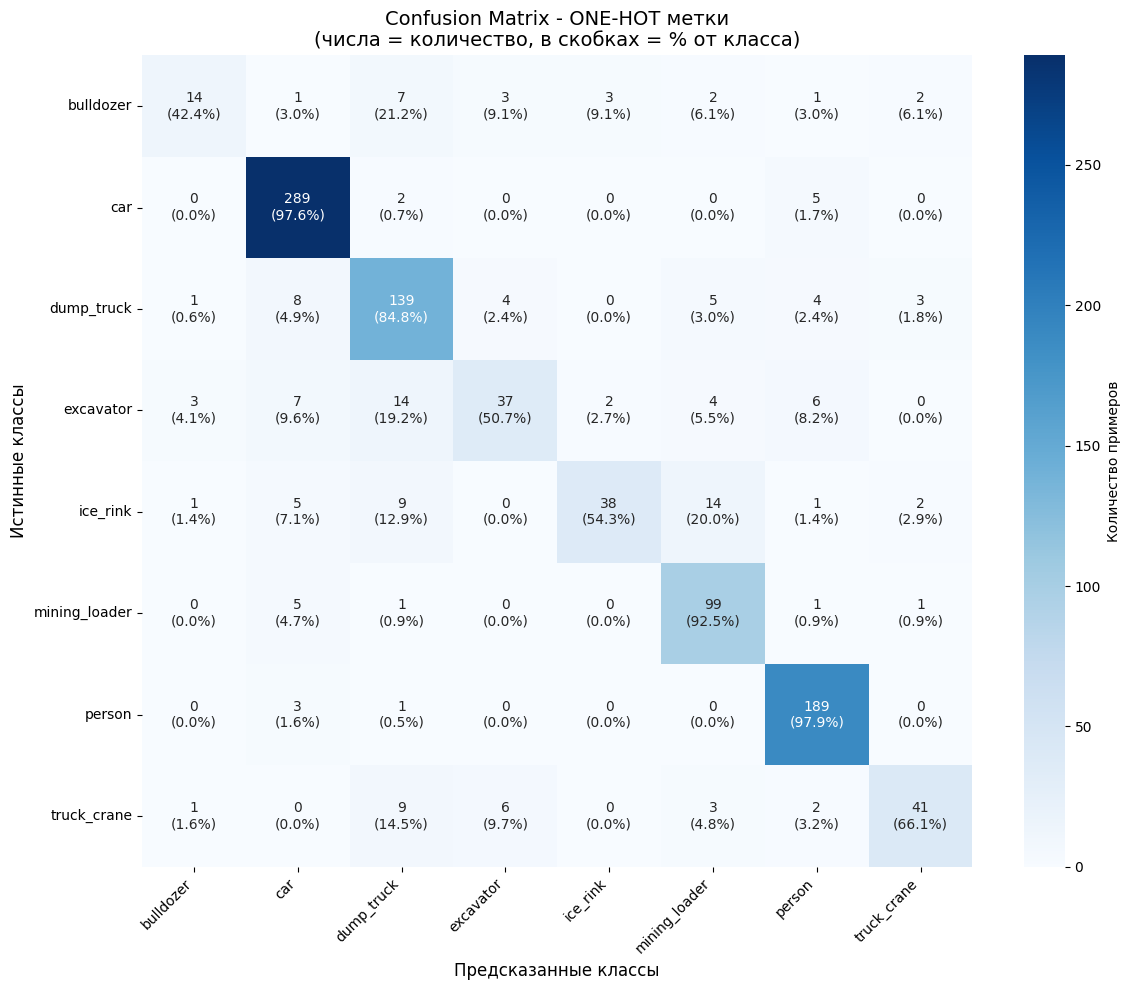


📊 ОБЩАЯ СТАТИСТИКА:
Всего примеров: 998
Общая точность: 0.8477 (84.77%)

🎯 ТОЧНОСТЬ ПО КЛАССАМ:
  bulldozer: 0.4242 (42.42%) - 14/33
  car: 0.9764 (97.64%) - 289/296
  dump_truck: 0.8476 (84.76%) - 139/164
  excavator: 0.5068 (50.68%) - 37/73
  ice_rink: 0.5429 (54.29%) - 38/70
  mining_loader: 0.9252 (92.52%) - 99/107
  person: 0.9793 (97.93%) - 189/193
  truck_crane: 0.6613 (66.13%) - 41/62

📋 ДЕТАЛЬНЫЙ ОТЧЕТ:
               precision    recall  f1-score   support

    bulldozer     0.7000    0.4242    0.5283        33
          car     0.9088    0.9764    0.9414       296
   dump_truck     0.7637    0.8476    0.8035       164
    excavator     0.7400    0.5068    0.6016        73
     ice_rink     0.8837    0.5429    0.6726        70
mining_loader     0.7795    0.9252    0.8462       107
       person     0.9043    0.9793    0.9403       193
  truck_crane     0.8367    0.6613    0.7387        62

     accuracy                         0.8477       998
    macro avg     0.8146    0.7

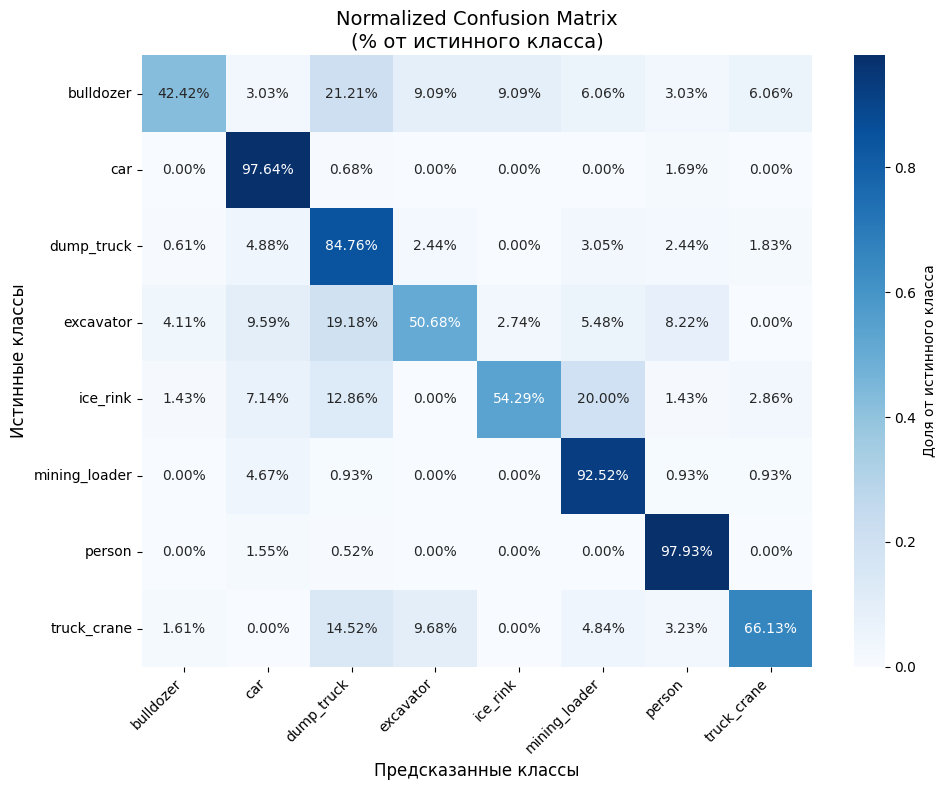

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def one_hot_confusion_matrix_with_percentages(model, dataset, class_names):
    """Confusion matrix для ONE-HOT меток с процентами"""
    
    print("🔍 Получаем предсказания для ONE-HOT меток...")
    
    # Собираем все предсказания и метки
    all_preds = []
    all_true_labels = []
    
    for images, labels in dataset:
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
    
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    # ONE-HOT → integer классы
    true_classes = np.argmax(all_true_labels, axis=1)
    pred_classes = np.argmax(all_preds, axis=1)
    
    print(f"✅ Обработано {len(true_classes)} примеров")
    
    # Confusion Matrix
    cm = confusion_matrix(true_classes, pred_classes, labels=range(len(class_names)))
    
    # 📊 ВИЗУАЛИЗАЦИЯ С ПРОЦЕНТАМИ
    plt.figure(figsize=(12, 10))
    
    # Создаем аннотации с абсолютными значениями и процентами
    annot_matrix = np.empty_like(cm, dtype=object)
    total_per_class = cm.sum(axis=1)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            count = cm[i, j]
            percentage = (count / total_per_class[i] * 100) if total_per_class[i] > 0 else 0
            annot_matrix[i, j] = f'{count}\n({percentage:.1f}%)'
    
    # Heatmap
    sns.heatmap(cm, annot=annot_matrix, fmt='', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Количество примеров'})
    
    plt.xlabel('Предсказанные классы', fontsize=12)
    plt.ylabel('Истинные классы', fontsize=12)
    plt.title('Confusion Matrix - ONE-HOT метки\n(числа = количество, в скобках = % от класса)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 📈 СТАТИСТИКА
    total_samples = len(true_classes)
    accuracy = np.sum(pred_classes == true_classes) / total_samples
    
    print(f"\n📊 ОБЩАЯ СТАТИСТИКА:")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    class_accuracies = []
    for i, class_name in enumerate(class_names):
        correct = cm[i, i]
        total = cm[i, :].sum()
        accuracy_class = correct / total if total > 0 else 0
        class_accuracies.append(accuracy_class)
        print(f"  {class_name}: {accuracy_class:.4f} ({accuracy_class*100:.2f}%) - {correct}/{total}")
    
    # 📋 CLASSIFICATION REPORT
    print(f"\n📋 ДЕТАЛЬНЫЙ ОТЧЕТ:")
    print(classification_report(true_classes, pred_classes, 
                              target_names=class_names, digits=4))
    
    return cm, class_accuracies

# 🚀 ЗАПУСК АНАЛИЗА
print("🚀 ЗАПУСК CONFUSION MATRIX ДЛЯ ONE-HOT МЕТОК...")
cm, accuracies = one_hot_confusion_matrix_with_percentages(best_model, validation_data, CLASS_LIST)

# 📉 ДОПОЛНИТЕЛЬНО: Нормализованная версия
def normalized_confusion_matrix(cm, class_names):
    """Нормализованная confusion matrix"""
    plt.figure(figsize=(10, 8))
    
    # Нормализуем по строкам (по истинным классам)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Заменяем NaN на 0
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Доля от истинного класса'})
    
    plt.xlabel('Предсказанные классы', fontsize=12)
    plt.ylabel('Истинные классы', fontsize=12)
    plt.title('Normalized Confusion Matrix\n(% от истинного класса)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

print("\n📉 НОРМАЛИЗОВАННАЯ CONFUSION MATRIX:")
normalized_confusion_matrix(cm, CLASS_LIST)

In [26]:
best_model = model.export_model()

# ПЕРЕКОМПИЛИРУЕМ для integer меток
best_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # ← для integer меток
    metrics=['accuracy']
)

print("✅ Модель перекомпилирована для integer меток")
best_model.summary()

✅ Модель перекомпилирована для integer меток


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 6, 6, 64)       │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,872,968 (224.58 MB)

 Trainable params: 58,729,224 (224.03 MB)

 Non-trainable params: 143,744 (561.50 KB)

🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...
📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...
🔄 Получаем предсказания...
🔄 Собираем предсказания и метки...
📦 Обработано батчей: 10
📦 Обработано батчей: 20
📦 Обработано батчей: 30
📦 Обработано батчей: 40
📦 Обработано батчей: 50
📦 Обработано батчей: 60
📦 Обработано батчей: 70
📦 Обработано батчей: 80
📦 Обработано батчей: 90
📦 Обработано батчей: 100
📦 Обработано батчей: 110
📦 Обработано батчей: 120
✅ Собрано 998 предсказаний
🔢 Уникальные истинные классы: [0 1 2 3 4 5 6 7]
🔢 Уникальные предсказанные классы: [0 1 2 3 4 5 6 7]
📋 Присутствующие классы: ['bulldozer', 'car', 'dump_truck', 'excavator', 'ice_rink', 'mining_loader', 'person', 'truck_crane']
📏 Confusion matrix shape: (8, 8)


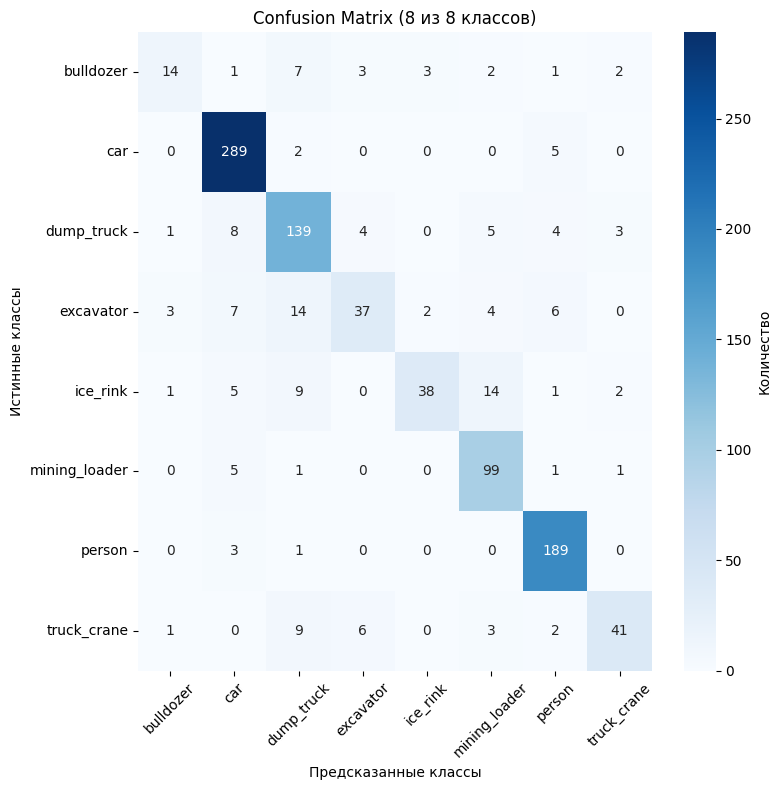


📈 ДЕТАЛЬНАЯ СТАТИСТИКА:
Всего примеров: 998
Общая точность: 0.8477

🎯 ТОЧНОСТЬ ПО КЛАССАМ:
  bulldozer: 0.4242 (14/33)
  car: 0.9764 (289/296)
  dump_truck: 0.8476 (139/164)
  excavator: 0.5068 (37/73)
  ice_rink: 0.5429 (38/70)
  mining_loader: 0.9252 (99/107)
  person: 0.9793 (189/193)
  truck_crane: 0.6613 (41/62)

📊 CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    bulldozer     0.7000    0.4242    0.5283        33
          car     0.9088    0.9764    0.9414       296
   dump_truck     0.7637    0.8476    0.8035       164
    excavator     0.7400    0.5068    0.6016        73
     ice_rink     0.8837    0.5429    0.6726        70
mining_loader     0.7795    0.9252    0.8462       107
       person     0.9043    0.9793    0.9403       193
  truck_crane     0.8367    0.6613    0.7387        62

     accuracy                         0.8477       998
    macro avg     0.8146    0.7330    0.7591       998
 weighted avg     0.8447    0.8477    0.8383   

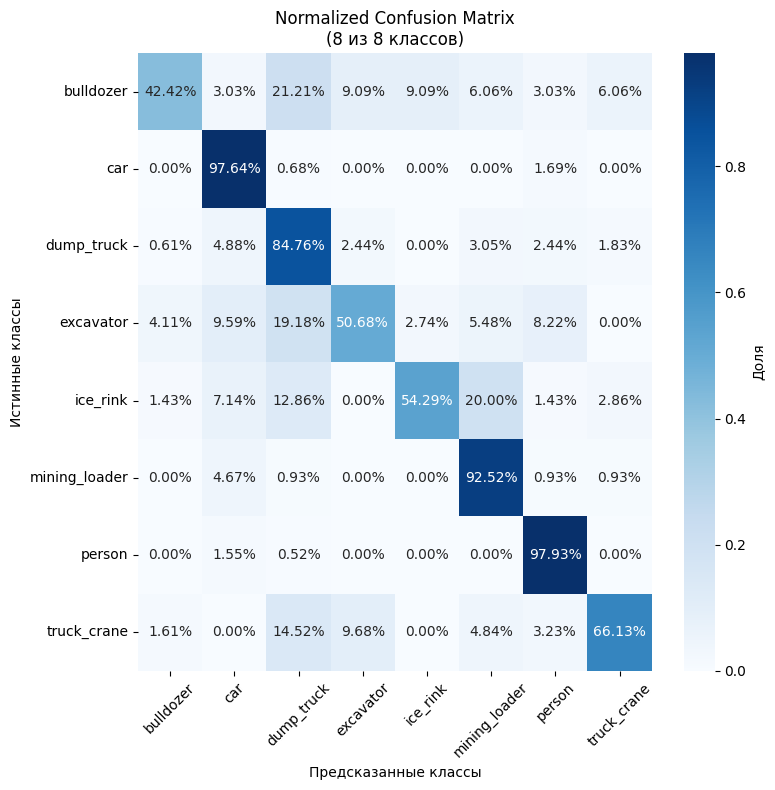

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

#history = final_history

'''
Синие тона:
cmap='Blues' # твой текущий
cmap='viridis' 
cmap='coolwarm'
cmap='icefire'

Зеленые тона:
cmap='Greens'
cmap='viridis'
cmap='summer'

Красные/оранжевые:
cmap='Reds'
cmap='Oranges'
cmap='YlOrBr'  
cmap='hot'

Фиолетовые:
cmap='Purples'
cmap='magma'
cmap='plasma'
'''


def get_all_predictions_modern(model, dataset):
    """Получает все предсказания и метки из датасета"""
    print("🔄 Собираем предсказания и метки...")
    
    all_preds = []
    all_true_labels = []
    
    # Проходим по всем батчам датасета
    for batch_idx, (images, labels) in enumerate(dataset):
        # Получаем предсказания для текущего батча
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
        
        # Прогресс каждые 10 батчей
        if (batch_idx + 1) % 10 == 0:
            print(f"📦 Обработано батчей: {batch_idx + 1}")
    
    # Объединяем все батчи
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    print(f"✅ Собрано {len(all_preds)} предсказаний")
    return all_preds, all_true_labels

def safe_confusion_matrix_analysis(model, dataset, class_names):
    """Безопасный анализ confusion matrix с автоматической обработкой отсутствующих классов"""
    print("📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...")
    
    # Получаем предсказания
    print("🔄 Получаем предсказания...")
    preds, true_labels = get_all_predictions_modern(model, dataset)
    
    # Для sparse categorical - метки уже целые числа, не нужно argmax
    if len(true_labels.shape) == 1:  # sparse labels [0, 1, 2, ...]
        true_classes = true_labels
    else:  # one-hot encoded labels
        true_classes = np.argmax(true_labels, axis=1)
    
    preds_classes = np.argmax(preds, axis=1)
    
    # Находим какие классы реально присутствуют в данных
    present_true_classes = np.unique(true_classes)
    present_pred_classes = np.unique(preds_classes)
    
    print(f"🔢 Уникальные истинные классы: {present_true_classes}")
    print(f"🔢 Уникальные предсказанные классы: {present_pred_classes}")
    
    # Определяем какие классы из class_names реально присутствуют
    present_class_indices = sorted(present_true_classes)
    present_class_names = [class_names[i] for i in present_class_indices]
    
    print(f"📋 Присутствующие классы: {present_class_names}")
    
    absent_classes = [class_names[i] for i in range(len(class_names)) if i not in present_true_classes]
    if absent_classes:
        print(f"❌ Отсутствующие классы: {absent_classes}")
    
    # Создаем confusion matrix только для присутствующих классов
    cm = confusion_matrix(true_classes, preds_classes, labels=present_class_indices)
    
    print(f"📏 Confusion matrix shape: {cm.shape}")
    
    # Визуализируем
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Количество'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Confusion Matrix ({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Статистика
    total_samples = len(true_classes)
    accuracy = np.sum(preds_classes == true_classes) / total_samples
    
    print(f"\n📈 ДЕТАЛЬНАЯ СТАТИСТИКА:")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f}")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    for i, class_idx in enumerate(present_class_indices):
        class_name = class_names[class_idx]
        correct = cm[i, i]
        total = np.sum(cm[i, :])
        accuracy = correct / total if total > 0 else 0
        print(f"  {class_name}: {accuracy:.4f} ({correct}/{total})")
    
    # Для отсутствующих классов
    if absent_classes:
        print(f"\n❌ ОТСУТСТВУЮЩИЕ КЛАССЫ В ВАЛИДАЦИИ:")
        for class_name in absent_classes:
            print(f"  {class_name}: 0 примеров")
    
    # Classification report только для присутствующих классов
    print(f"\n📊 CLASSIFICATION REPORT:")
    print(classification_report(true_classes, preds_classes, 
                              labels=present_class_indices,
                              target_names=present_class_names, 
                              digits=4))
    
    # Нормализованная confusion matrix
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Заменяем NaN на 0
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Доля'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Normalized Confusion Matrix\n({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm, present_class_names

# 🎯 ЗАПУСКАЕМ АНАЛИЗ
print("🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...")
cm, present_classes = safe_confusion_matrix_analysis(best_model, validation_data, CLASS_LIST)

🎲 Тестирование случайных примеров...


TypeError: only integer scalar arrays can be converted to a scalar index

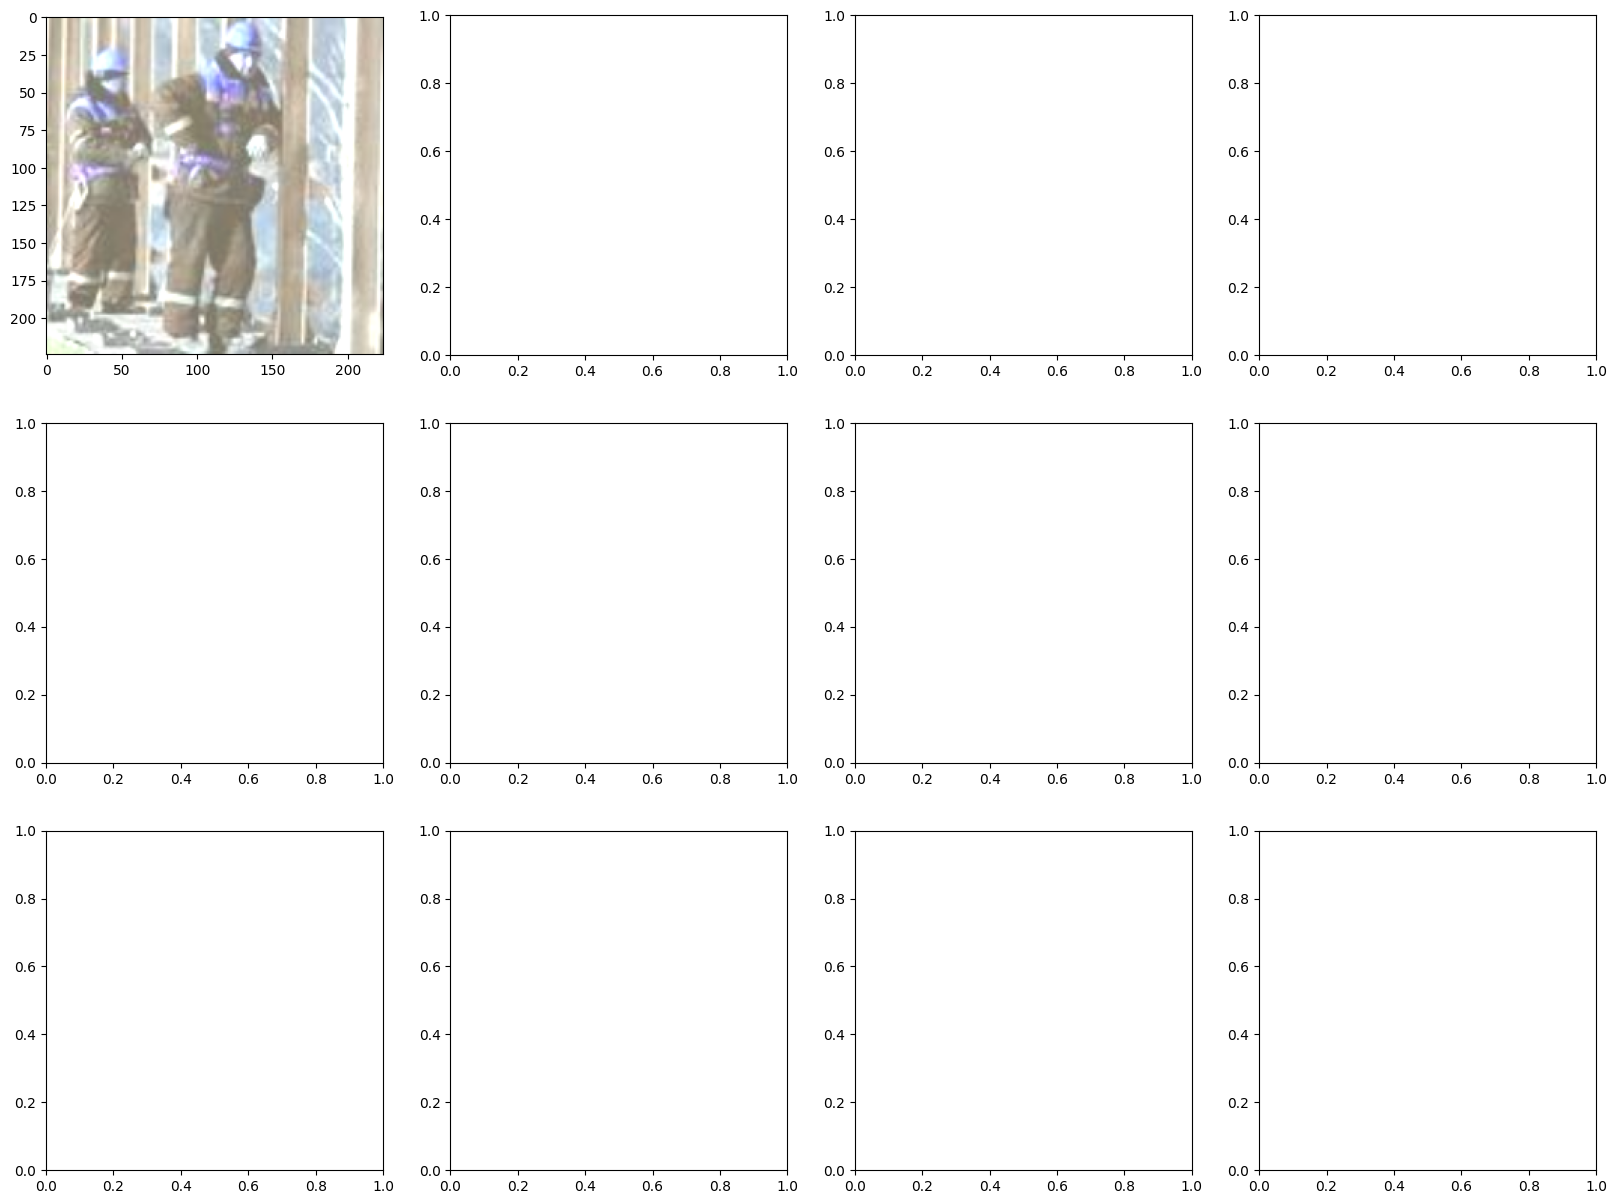

In [17]:
# рандом ВЕРСИЯ ДЛЯ SPARSE LABELS 

def test_random_predictions_modern(model, dataset, class_names, num_samples=12):
    """
    Тестирование случайных примеров из всего датасета
    ВЕРСИЯ ДЛЯ SPARSE LABELS (целочисленные метки)
    """
    # Собираем все изображения и метки
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())
    
    # Объединяем все батчи
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Выбираем случайные индексы
    total_samples = len(all_images)
    indices = np.random.choice(total_samples, min(num_samples, total_samples), replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Предсказания
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # ДЛЯ SPARSE LABELS - просто используем как есть, без argmax!
    true_classes = selected_labels  # ← ИСПРАВЛЕНИЕ ЗДЕСЬ
    
    # Создаем сетку
    cols = 4
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif rows > 1 and cols == 1:
        axes = axes.reshape(-1, 1)
    
    correct = 0
    for i, idx in enumerate(indices):
        if rows == 1:
            ax = axes[col] if cols > 1 else axes
        else:
            row_idx = i // cols
            col_idx = i % cols
            ax = axes[row_idx, col_idx]
        
        # Денормализация для ResNet50
        image = selected_images[i].copy()
        image[..., 0] += 103.939
        image[..., 1] += 116.779  
        image[..., 2] += 123.68
        image = np.clip(image, 0, 255).astype('uint8')
        image = image[..., ::-1]  # BGR to RGB
        
        ax.imshow(image)
        
        true_class = class_names[true_classes[i]]
        pred_class = class_names[predicted_classes[i]]
        confidence = np.max(predictions[i])
        
        color = 'green' if true_class == pred_class else 'red'
        if true_class == pred_class:
            correct += 1
            
        ax.set_title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}", 
                    color=color, fontsize=10)
        ax.axis('off')
    
    # Скрываем пустые оси
    for i in range(len(indices), rows * cols):
        if rows == 1:
            if cols > 1:
                axes[i].axis('off')
        else:
            row_idx = i // cols
            col_idx = i % cols
            axes[row_idx, col_idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    accuracy = correct / len(indices) * 100
    print(f"📊 Точность на {len(indices)} случайных примерах: {correct}/{len(indices)} ({accuracy:.1f}%)")
    
    return correct, accuracy

# Использование случайных примеров:
print("🎲 Тестирование случайных примеров...")
correct, accuracy = test_random_predictions_modern(best_model, validation_data, CLASS_LIST, num_samples=12)

🎲 Тестирование случайных примеров (универсальная версия)...
🔍 Обнаружен формат меток: ONE-HOT


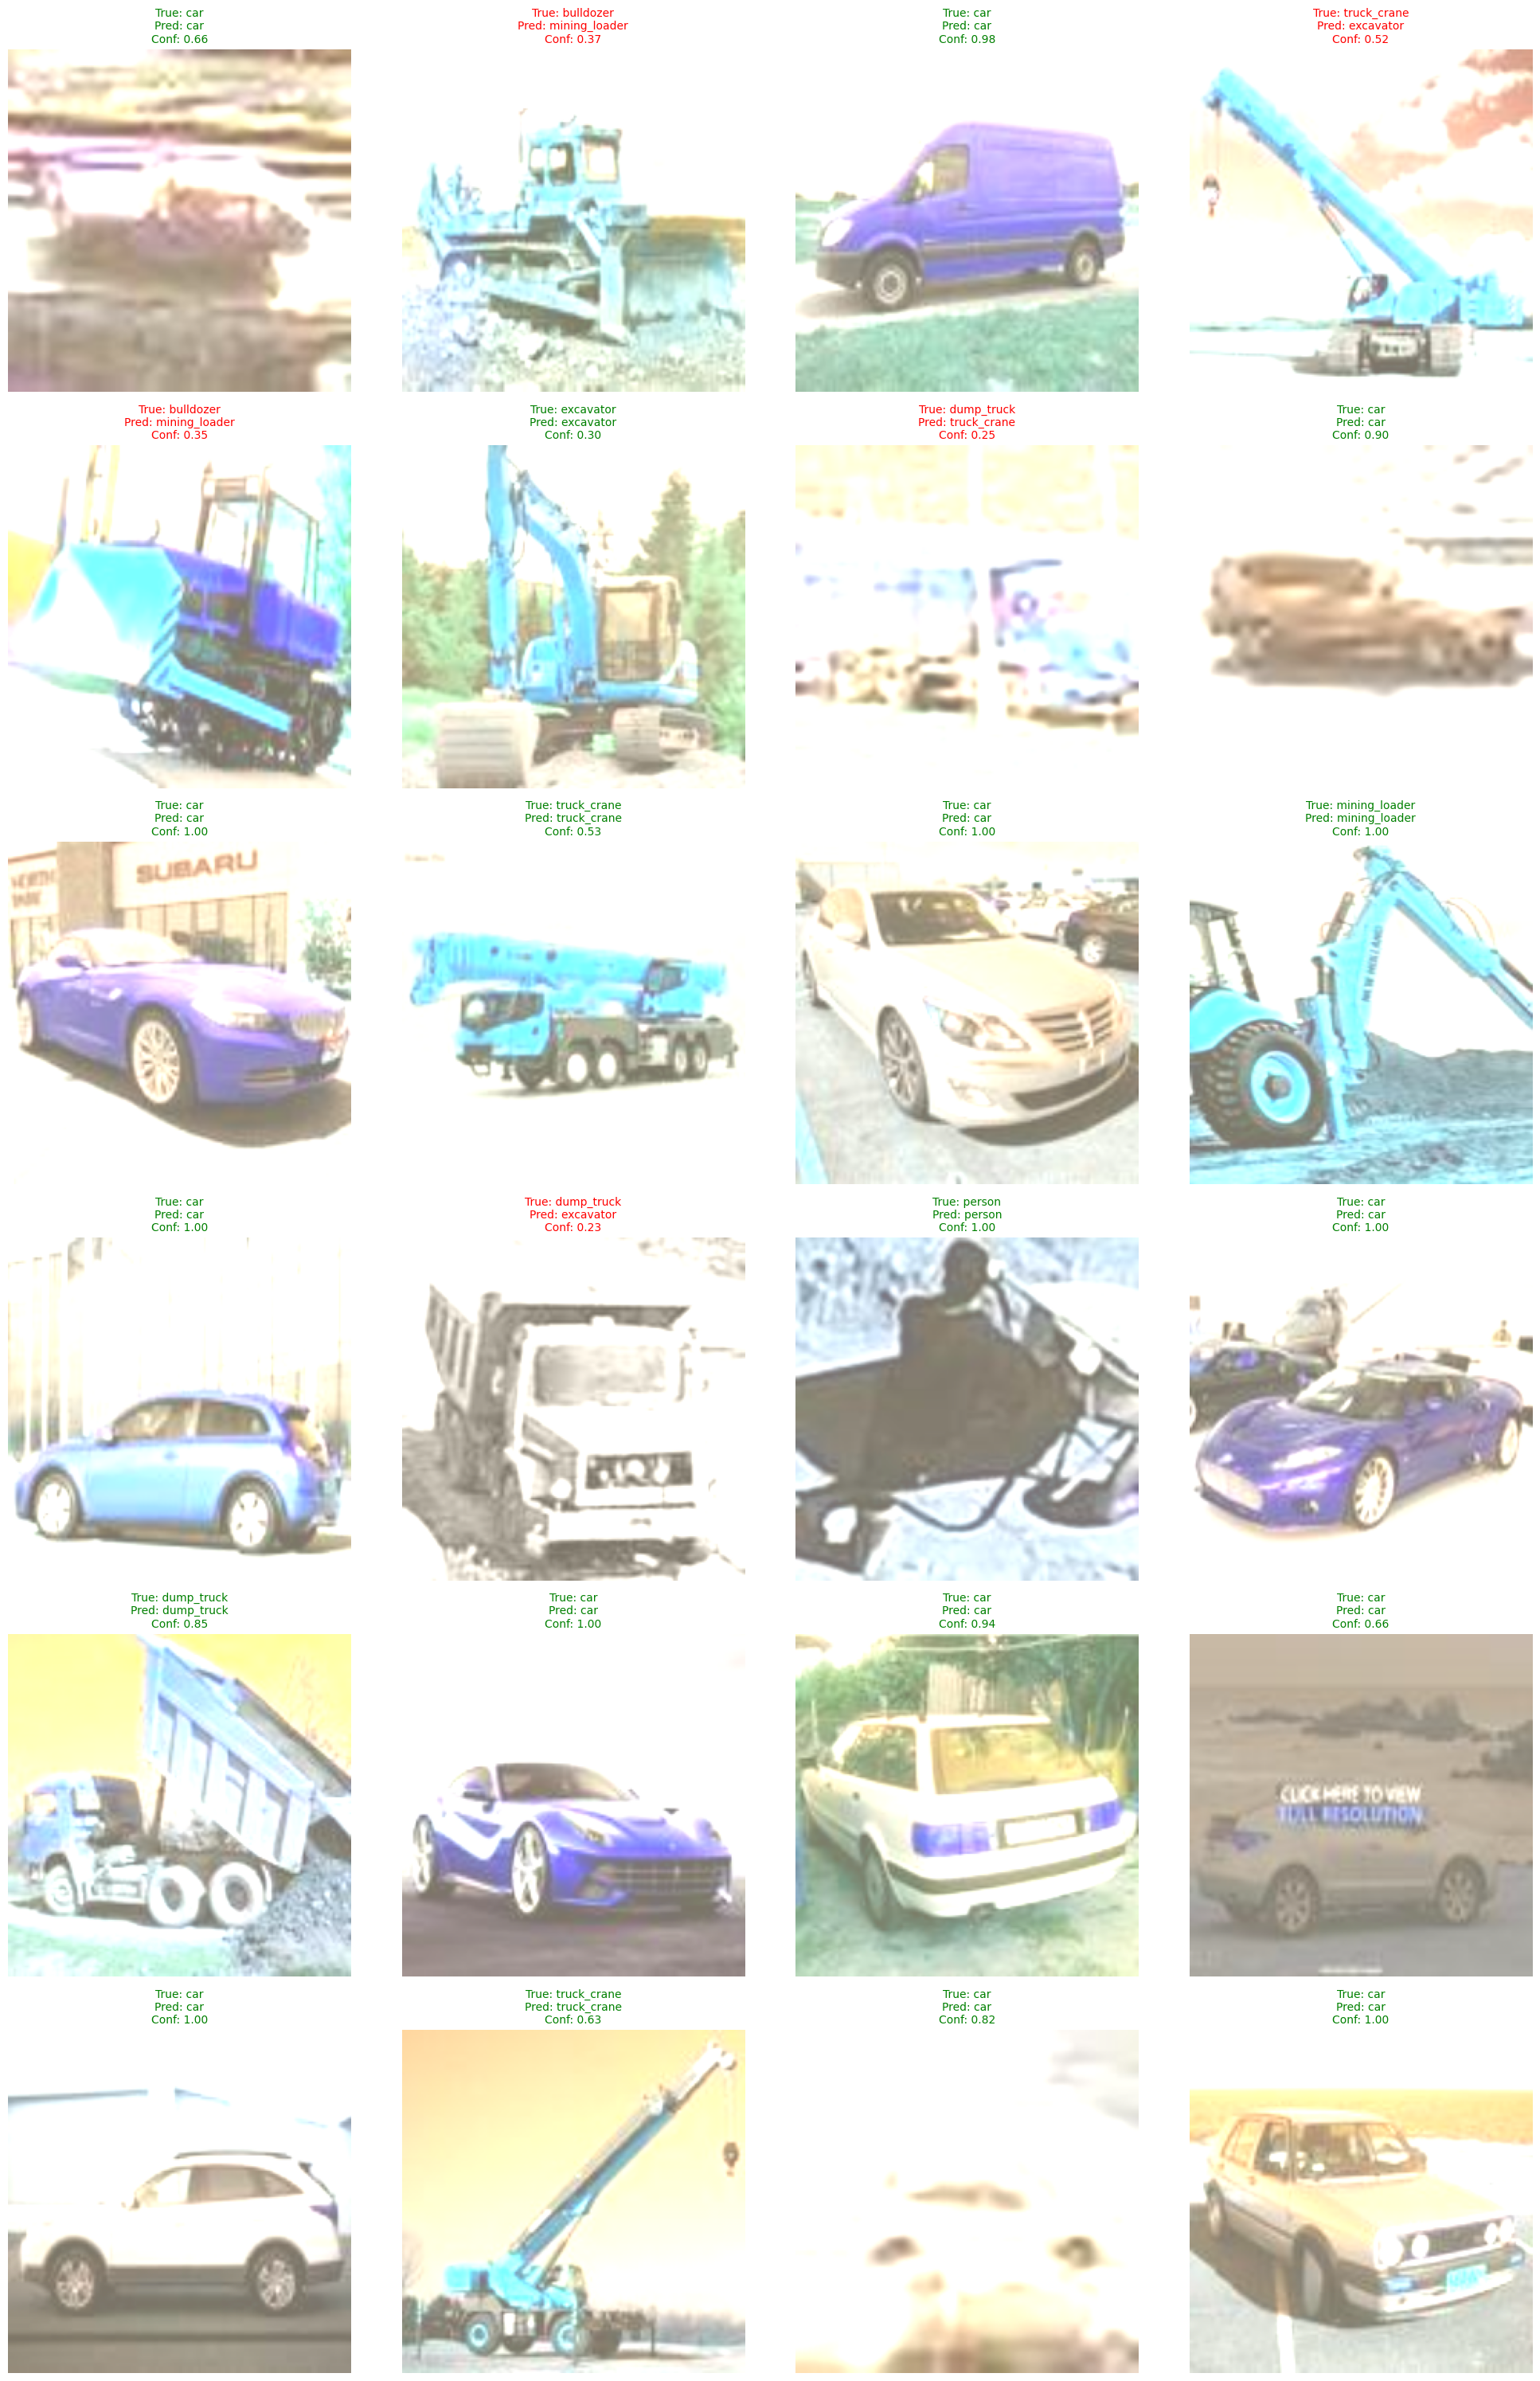

📊 Точность на 24 случайных примерах: 19/24 (79.2%)
🎯 Формат меток: ONE-HOT


In [38]:
# рандом УНИВЕРСАЛЬНАЯ ВЕРСИЯ (работает с любым форматом)

def test_random_predictions_universal(model, dataset, class_names, num_samples=12):
    """
    Универсальная версия для любого формата меток
    """
    # Собираем все изображения и метки
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())
    
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Выбираем случайные индексы
    total_samples = len(all_images)
    indices = np.random.choice(total_samples, min(num_samples, total_samples), replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Предсказания
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # АВТОМАТИЧЕСКОЕ ОПРЕДЕЛЕНИЕ ФОРМАТА МЕТОК
    if len(selected_labels.shape) == 1:  # SPARSE labels
        true_classes = selected_labels
        label_format = "SPARSE"
    else:  # ONE-HOT labels
        true_classes = np.argmax(selected_labels, axis=1)
        label_format = "ONE-HOT"
    
    print(f"🔍 Обнаружен формат меток: {label_format}")
    
    # Создаем сетку
    cols = 4
    rows = (len(indices) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    correct = 0
    for i, idx in enumerate(indices):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        
        # Умная денормализация
        image = selected_images[i].copy()
        
        # Автоматическое определение диапазона
        if image.min() >= -1 and image.max() <= 1:
            image = (image + 1) * 127.5
        elif image.min() >= 0 and image.max() <= 1:
            image = image * 255
        else:
            # ImageNet нормализация
            image[..., 0] += 103.939
            image[..., 1] += 116.779  
            image[..., 2] += 123.68
        
        image = np.clip(image, 0, 255).astype('uint8')
        image = image[..., ::-1]  # BGR to RGB
        
        ax.imshow(image)
        
        true_class = class_names[true_classes[i]]
        pred_class = class_names[predicted_classes[i]]
        confidence = np.max(predictions[i])
        
        color = 'green' if true_class == pred_class else 'red'
        if true_class == pred_class:
            correct += 1
            
        ax.set_title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}", 
                    color=color, fontsize=10)
        ax.axis('off')
    
    # Скрываем пустые оси
    for i in range(len(indices), rows * cols):
        row = i // cols
        col = i % cols
        if rows > 1:
            axes[row, col].axis('off')
        else:
            axes[col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    accuracy = correct / len(indices) * 100
    print(f"📊 Точность на {len(indices)} случайных примерах: {correct}/{len(indices)} ({accuracy:.1f}%)")
    print(f"🎯 Формат меток: {label_format}")
    
    return correct, accuracy

# Тестируем универсальную версию
print("🎲 Тестирование случайных примеров (универсальная версия)...")
correct, accuracy = test_random_predictions_universal(best_model, validation_data, CLASS_LIST, num_samples=24)

In [ ]:
# Сохраните модель

# Сохраняем обученную модель
model.save('cats_dogs_classifier.h5')
print("💾 Модель сохранена как 'cats_dogs_classifier.h5'")

# Или сохраняем только веса
model.save_weights('cats_dogs_weights.h5')
print("💾 Веса сохранены как 'cats_dogs_weights.h5'")

In [32]:
# Сохраняем в современном формате
model.save('best_model_scotp-2.keras')
print("💾 Модель сохранена как 'best_model_1.keras'")

💾 Модель сохранена как 'best_model_1.keras'
